In [1]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
import plotly.plotly as py
import scipy.stats as stats
import statsmodels.api as sm
from datetime import datetime
import matplotlib.pyplot as plot

import warnings
warnings.filterwarnings('ignore')
titanic = pd.read_csv('train_titanic.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic_data=titanic[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]

In [5]:
titanic_data=titanic_data.dropna()

In [6]:
titanic_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708
10,1,3,female,4.0,1,1,16.7000


In [7]:
target = titanic_data['Survived']
titanic_data=titanic_data[['Pclass','Sex','Age','SibSp','Parch','Fare']]

In [8]:
for i in range(len(titanic_data)):
    if (titanic_data['Sex'].iloc[i]=='male'):
        titanic_data['Sex'].iloc[i]=0
    elif(titanic_data['Sex'].iloc[i]=='female'):
        titanic_data['Sex'].iloc[i]=1

In [9]:
titan=titanic_data

In [10]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [11]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(titanic_data, target, test_size=0.20, random_state=111)

In [12]:
log_reg.fit(X_eğitim, y_eğitim)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
egitim_dogruluk = log_reg.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.76


In [14]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_eğitim, y_eğitim)
egitim_dogruluk = log_reg_mnm.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.78


In [15]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,y_eğitim)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_eğitim, y_eğitim),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)    

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.683012,0.657343
1,0.010,0.719790,0.727273
2,0.100,0.800350,0.769231
3,1.000,0.798599,0.755245
4,10.000,0.802102,0.776224
5,100.000,0.803853,0.776224
6,1000.000,0.803853,0.776224


In [16]:
#etkili elemanları değiştirirsek;

In [17]:
titanic_data=titanic_data[['Pclass','Sex','Age','SibSp','Parch']]

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [19]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(titanic_data, target, test_size=0.20, random_state=111)

In [20]:
log_reg.fit(X_eğitim, y_eğitim)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
egitim_dogruluk = log_reg.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.75


In [22]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_eğitim, y_eğitim)
egitim_dogruluk = log_reg_mnm.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.81
Modelin test verisindeki doğruluğu   : 0.79


In [23]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,y_eğitim)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_eğitim, y_eğitim),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)    

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.586690,0.615385
1,0.010,0.733800,0.769231
2,0.100,0.789842,0.776224
3,1.000,0.798599,0.748252
4,10.000,0.812609,0.783217
5,100.000,0.810858,0.783217
6,1000.000,0.810858,0.783217


In [24]:
#iki sutünü birleştiriyorum,tek olarak sokulacak modele

In [25]:
titanic_data['sibparch']=titanic_data['Parch']

In [26]:
for i in range(len(titanic_data)):
    titanic_data['sibparch'].iloc[i]==titanic_data['SibSp'].iloc[i]+titanic_data['Parch'].iloc[i]
        

In [27]:
titanic_data=titanic_data[['Pclass','Sex','Age','sibparch']]

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [29]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(titanic_data, target, test_size=0.20, random_state=111)

In [30]:
log_reg.fit(X_eğitim, y_eğitim)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
egitim_dogruluk = log_reg.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.78


In [32]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_eğitim, y_eğitim)
egitim_dogruluk = log_reg_mnm.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.77


In [33]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,y_eğitim)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_eğitim, y_eğitim),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)    

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.586690,0.615385
1,0.010,0.733800,0.762238
2,0.100,0.791594,0.776224
3,1.000,0.800350,0.776224
4,10.000,0.803853,0.762238
5,100.000,0.805604,0.769231
6,1000.000,0.805604,0.769231


In [34]:
#yukarıdaki 3 farklı modele gore en uygunu ikinci olan yanı data sında 'Pclass','Sex','Age','SibSp','Parch' sutünları olan , yani değişkenleri barındıran gibi gözüküyor, yöntem olarak ta Multinomial (Softmax) daha iyi gözüküyor 

## 3. bolum Performans Ölçüm metrikleri ödevi

In [35]:
titan=titan[['Pclass','Sex','Age','SibSp','Parch']]

In [36]:
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(titan, target, test_size=0.20, random_state=111)
yasama_tahmin_modeli = LogisticRegression()
yasama_tahmin_modeli.fit(X_eğitim, y_eğitim)

tahmin_eğitim = yasama_tahmin_modeli.predict(X_eğitim)
tahmin_test = yasama_tahmin_modeli.predict(X_test)
tahmin_test_ihtimal = yasama_tahmin_modeli.predict_proba(X_test)[:,1]

In [37]:
from sklearn.metrics import confusion_matrix
hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)

In [38]:
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Eğitim verileri)
------------------------------
[[289  47]
 [ 68 167]]
Hata Matrisi (Test verileri)
------------------------------
[[70 18]
 [18 37]]


In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("accuracy_score() değeri         : ",  accuracy_score(y_test, tahmin_test))
print("precision_score() değeri        : ",  precision_score(y_test, tahmin_test))
print("recall_score() değeri        : ",  recall_score(y_test, tahmin_test))
print("Hesaplanan özgünlük değeri   : ",  (TN)/(TN + FP))
print("f1_score() değeri     : ",  f1_score(y_test, tahmin_test))

accuracy_score() değeri         :  0.7482517482517482
precision_score() değeri        :  0.6727272727272727
recall_score() değeri        :  0.6727272727272727
Hesaplanan özgünlük değeri   :  0.7954545454545454
f1_score() değeri     :  0.6727272727272727


In [40]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,tahmin_test) )

print("f1_score() değeri        : {:.2f}".format(f1_score(y_test, tahmin_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(y_test, tahmin_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(y_test, tahmin_test)))
print('\n')

metrikler =  precision_recall_fscore_support(y_test, tahmin_test)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2]) 

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        88
           1       0.67      0.67      0.67        55

    accuracy                           0.75       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143

f1_score() değeri        : 0.67
recall_score() değeri    : 0.67
precision_score() değeri : 0.67


Hassasiyet : [0.79545455 0.67272727]
Duyarlılık : [0.79545455 0.67272727]
F1 Skoru   : [0.79545455 0.67272727]


In [41]:
# C degerlerine göre grafikleri çizdirelim.

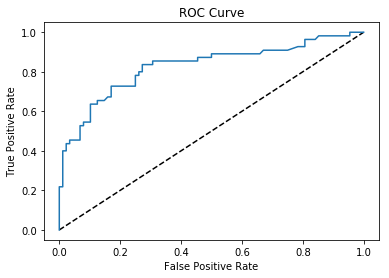

AUC Değeri :  0.8270661157024793


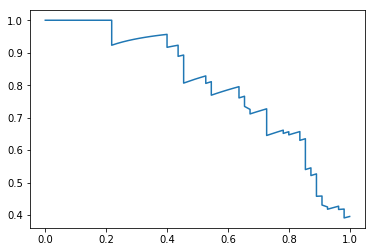

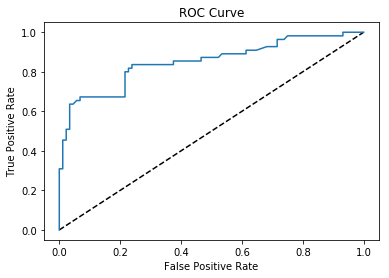

AUC Değeri :  0.85


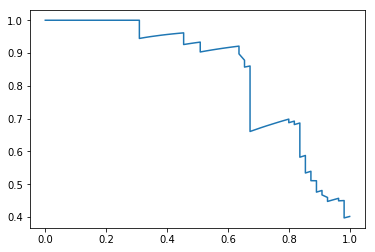

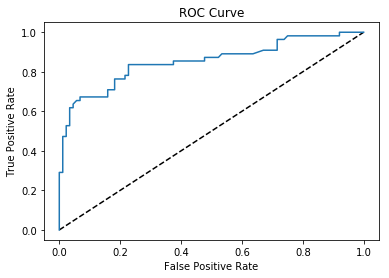

AUC Değeri :  0.8522727272727273


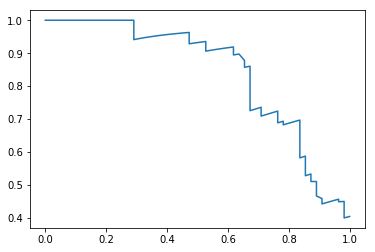

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

C_değerleri = [0.01,1,100]

for c in C_değerleri:
    # Apply logistic regression model to training data
    X_eğitim, X_test, y_eğitim, y_test =  train_test_split(titan, target, test_size=0.20, random_state=111)
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,y_eğitim)

    tahmin_eğitim = lr.predict(X_eğitim)
    tahmin_test = lr.predict(X_test)
    tahmin_test_ihtimal = lr.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    print('AUC Değeri : ', roc_auc_score(y_test, tahmin_test_ihtimal))
    
    
    hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)

    plt.plot(duyarlılık, hassasiyet)
    plt.show()

## çapraz dogrulama ödevi

In [43]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=6, shuffle=True, random_state=1111)
Xx=titan
X=Xx.copy()
yy=target
y=yy.copy()
X.index=[i for i in range(714)]
y.index=[i for i in range(714)]


In [44]:
parcalar = kf.split(X)
for num, (eğitim_index, test_index) in enumerate(parcalar):
    print("{}.Eğitim Kümesi Boyutu : {}".format(num+1,eğitim_index))
    print("{}.Test Kümesi Boyutu   : {}".format(num+1,test_index))
    print('-'*27)


1.Eğitim Kümesi Boyutu : [  1   3   4   5   6   8   9  10  11  12  13  14  15  17  18  19  20  21
  22  23  24  26  27  28  29  30  31  34  35  36  37  39  40  41  42  43
  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  63
  64  67  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  87  88  90  91  92  93  96  97  98  99 100 101 102 104 105 106 108
 109 110 111 112 113 114 115 116 117 118 120 121 122 123 124 125 126 127
 128 130 131 132 135 136 137 138 139 140 141 143 144 146 147 148 149 151
 152 153 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 217 218 219 220 221 224 225 226 227 228 230 231
 232 233 234 235 236 237 243 244 246 247 248 249 250 251 252 254 255 256
 257 258 259 260 261 262 263 264 265 266 267 268 269 270 272 273 274 276
 277 278 279 280 281 282 2

In [45]:
from sklearn.metrics import mean_squared_error
X=titan
y=target
X.index=[i for i in range(714)]
y.index=[i for i in range(714)]
X_eğitim=X.copy()
X_test=X.copy()
y_eğitim=y.copy()
y_test=y.copy()

In [46]:
model2 = LogisticRegression()
kf = KFold(n_splits=6, shuffle=True, random_state=1111)
parcalar = kf.split(X)
dogruluk_liste = []
for i, (eğitim_index, test_index) in enumerate(parcalar):
    X=titan
    y=target
    X.index=[i for i in range(714)]
    y.index=[i for i in range(714)]
    X_eğitim=X.copy()
    X_test=X.copy()
    y_eğitim=y.copy()
    y_test=y.copy()
    
    X_eğitim.drop(test_index,inplace=True)
    y_eğitim.drop(test_index,axis=0,inplace=True)
    X_test.drop(eğitim_index,axis=0,inplace=True)
    y_test.drop(eğitim_index,axis=0,inplace=True)
    model2.fit(X_eğitim, y_eğitim)
    tahmin = model2.predict(X_test)
    dogruluk_degeri = model2.score(X_test, y_test)  
    dogruluk_liste.append(dogruluk_degeri)
    print("{}.Parça Doğruluk Değeri: {:.3f}".format(i+1, dogruluk_degeri))
    print("-"*30)

1.Parça Doğruluk Değeri: 0.790
------------------------------
2.Parça Doğruluk Değeri: 0.782
------------------------------
3.Parça Doğruluk Değeri: 0.807
------------------------------
4.Parça Doğruluk Değeri: 0.748
------------------------------
5.Parça Doğruluk Değeri: 0.790
------------------------------
6.Parça Doğruluk Değeri: 0.790
------------------------------


In [47]:
print("Ortalama doğruluk değeri : {:.2f}".format(np.mean(dogruluk_liste)))

Ortalama doğruluk değeri : 0.78


In [50]:
from sklearn.model_selection import cross_validate, cross_val_score



In [53]:
lrm = LogisticRegression()
cv = cross_validate(estimator=lrm,
                     X=X,
                     y=y,
                     cv=10,
                     return_train_score=True,
                    )
cv

{'fit_time': array([0.00299287, 0.00296807, 0.00199032, 0.00301957, 0.00199556,
        0.00197911, 0.00199389, 0.00199652, 0.0029664 , 0.00399113]),
 'score_time': array([0.        , 0.        , 0.00099635, 0.        , 0.00099492,
        0.00099826, 0.00096893, 0.00099277, 0.0010283 , 0.        ]),
 'test_score': array([0.79166667, 0.73611111, 0.79166667, 0.88888889, 0.74647887,
        0.78873239, 0.77464789, 0.74647887, 0.8028169 , 0.8028169 ]),
 'train_score': array([0.80373832, 0.80373832, 0.80529595, 0.79283489, 0.7962675 ,
        0.80093313, 0.7962675 , 0.79782271, 0.7962675 , 0.79315708])}

In [54]:
print('Test Skorları            : ', cv['test_score'], sep = '\n')
print("-"*50)
print('Eğitim Skorları          : ', cv['train_score'], sep = '\n')

Test Skorları            : 
[0.79166667 0.73611111 0.79166667 0.88888889 0.74647887 0.78873239
 0.77464789 0.74647887 0.8028169  0.8028169 ]
--------------------------------------------------
Eğitim Skorları          : 
[0.80373832 0.80373832 0.80529595 0.79283489 0.7962675  0.80093313
 0.7962675  0.79782271 0.7962675  0.79315708]


In [55]:
print('Test Kümesi   Ortalaması : ', cv['test_score'].mean())
print('Eğitim Kümesi Ortalaması : ', cv['train_score'].mean())

Test Kümesi   Ortalaması :  0.7870305164319249
Eğitim Kümesi Ortalaması :  0.7986322873214051


In [59]:
cv = cross_validate(estimator=lrm, 
                     X=X,
                     y=y,
                     cv=10,
                     scoring = ['accuracy', 'precision', 'r2'],
                     return_train_score=True,
                    )

In [60]:
print('Test Kümesi Doğruluk Ortalaması     : {:.2f}'.format(cv['test_accuracy'].mean()))
print('Test Kümesi R-kare  Ortalaması      : {:.2f}'.format(cv['test_r2'].mean()))
print('Test Kümesi Hassasiyet Ortalaması   : {:.2f}'.format(cv['test_precision'].mean()))
print('Eğitim Kümesi Doğruluk Ortalaması   : {:.2f}'.format(cv['train_accuracy'].mean()))
print('Eğitim Kümesi R-kare  Ortalaması    : {:.2f}'.format(cv['train_r2'].mean()))
print('Eğitim Kümesi Hassasiyet Ortalaması : {:.2f}'.format(cv['train_precision'].mean()))

Test Kümesi Doğruluk Ortalaması     : 0.79
Test Kümesi R-kare  Ortalaması      : 0.12
Test Kümesi Hassasiyet Ortalaması   : 0.76
Eğitim Kümesi Doğruluk Ortalaması   : 0.80
Eğitim Kümesi R-kare  Ortalaması    : 0.17
Eğitim Kümesi Hassasiyet Ortalaması : 0.78


In [61]:
cv = cross_val_score(estimator=lrm,
                     X=X,
                     y=y,
                     cv=10                    
                    )
print('Model Skorları            : ', cv, sep = '\n')

Model Skorları            : 
[0.79166667 0.73611111 0.79166667 0.88888889 0.74647887 0.78873239
 0.77464789 0.74647887 0.8028169  0.8028169 ]


In [62]:
from sklearn.model_selection import cross_val_predict
y_tahmin = cross_val_predict(estimator=lrm, X=X, y=y, cv=10)
print(y_tahmin[0:10])

[0 1 1 1 0 0 0 1 1 1]


In [67]:
logreg = LogisticRegression()
print(logreg.get_params())
parametreler = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parametreler,
                       cv = 10
                      )
grid_cv.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [70]:
print("En iyi parametreler : ", grid_cv.best_params_)
print("En iyi skor         : ", grid_cv.best_score_)

En iyi parametreler :  {'C': 100, 'penalty': 'l1'}
En iyi skor         :  0.7997198879551821


In [71]:
sonuçlar = grid_cv.cv_results_
df = pd.DataFrame(sonuçlar)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001695,0.000458,0.000698,0.000457,1e-05,l1,"{'C': 1e-05, 'penalty': 'l1'}",0.597222,0.597222,0.597222,0.597222,0.591549,0.591549,0.591549,0.591549,0.591549,0.591549,0.593838,0.002783,14
1,0.001697,0.000458,0.000397,0.000486,1e-05,l2,"{'C': 1e-05, 'penalty': 'l2'}",0.597222,0.597222,0.597222,0.597222,0.591549,0.591549,0.591549,0.591549,0.591549,0.591549,0.593838,0.002783,14
2,0.001297,0.000457,0.000200,0.000399,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",0.597222,0.597222,0.597222,0.597222,0.591549,0.591549,0.591549,0.591549,0.591549,0.591549,0.593838,0.002783,14
3,0.000997,0.000773,0.001005,0.001733,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.597222,0.597222,0.597222,0.597222,0.591549,0.591549,0.591549,0.591549,0.591549,0.591549,0.593838,0.002783,14
4,0.000000,0.000000,0.001563,0.004688,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.597222,0.597222,0.597222,0.597222,0.591549,0.591549,0.591549,0.591549,0.591549,0.591549,0.593838,0.002783,14


In [72]:
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

,param_penalty,param_C,mean_test_score
19,l2,10000,0.799720
18,l1,10000,0.799720
17,l2,1000,0.799720
16,l1,1000,0.799720
15,l2,100,0.799720
14,l1,100,0.799720
12,l1,10,0.798319
13,l2,10,0.798319
10,l1,1,0.795518
9,l2,0.1,0.787115


In [65]:
from sklearn.model_selection import RandomizedSearchCV
logreg = LogisticRegression()
rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(X, y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_sta

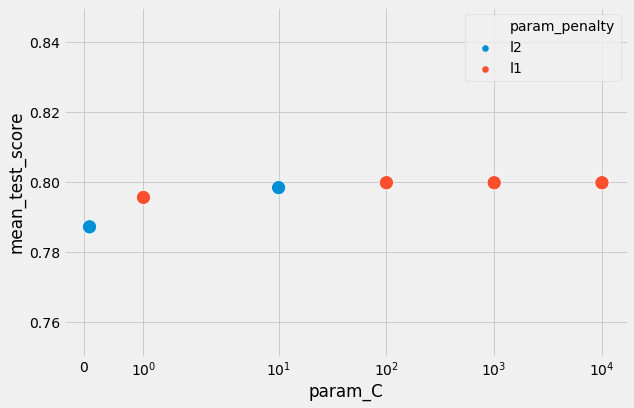

In [77]:
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df[0:10], s=200)
plt.xscale('symlog')
plt.ylim((0.75,0.85))
plt.show()

In [79]:

parametreler = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [80]:
from sklearn.model_selection import RandomizedSearchCV
rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(X, y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_sta

In [81]:
print("En iyi parametreler        : ", rs_cv.best_params_)
print("Tüm hassasiyet değerleri   : ", rs_cv.cv_results_['mean_test_score'])
print("En iyi hassasiyet değeri   : ", rs_cv.best_score_)

En iyi parametreler        :  {'penalty': 'l1', 'C': 100}
Tüm hassasiyet değerleri   :  [0.         0.         0.77712452 0.7637159  0.77951184 0.77951184
 0.         0.         0.77951184 0.        ]
En iyi hassasiyet değeri   :  0.779511840621416


In [82]:
sonuçlar_rs = rs_cv.cv_results_
df_rs = pd.DataFrame(sonuçlar_rs)

In [83]:
sonuçlar_rs = rs_cv.cv_results_
df_rs = pd.DataFrame(sonuçlar_rs)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)
df_rs

,param_penalty,param_C,mean_test_score
4,l1,100,0.779512
5,l2,1000,0.779512
8,l1,1000,0.779512
2,l2,10,0.777125
3,l2,1,0.763716
0,l2,0.0001,0.000000
1,l2,0.001,0.000000
6,l1,0.01,0.000000
7,l1,0.001,0.000000
9,l1,1e-05,0.000000


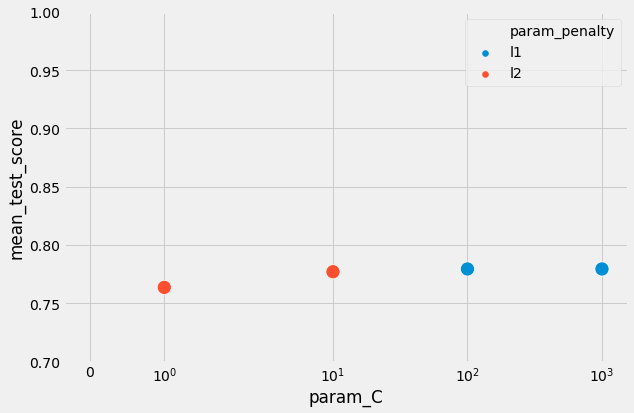

In [85]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df_rs, s=200)
plt.xscale('symlog')
plt.ylim((0.7,1))
plt.show()